**KÜTÜPHANELERİN TANIMLANMASI **

In [31]:

import tensorflow as tf
from tensorflow.keras import datasets , layers,models
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

VERİ SETİ YÜKLEME (CIFAR10)

In [32]:
#cifar10 dataestini tanımlayıp değişkenlere atanan kısım
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

#X_train ile X_test'de ne kadar veri olduğu ve boyutlarını öğreniyoruz.
X_train.shape
X_test.shape

#Y_test  ve Y_train içeriklerini tek boyutluya çeviriyoruz.
Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)
Y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

VERİLERİ İNCELEYELİM

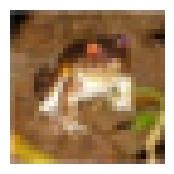

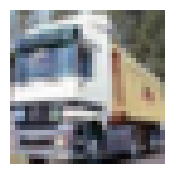

In [33]:
#cifar10 veri setindeki sınıflandırmalara karşılık gelen isimleri belirtiyoruz
resim_siniflari=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


# Belirlediğimiz index numarası ile resim_siniflari içerisindeki veriyi göstermeye yarayan fonksiyon
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(resim_siniflari[y[index]])
  plt.axis('off')
  plt.show()

#Örnek veri gösterimi
plot_sample(X_train,Y_train,0)
plot_sample(X_train,Y_train,1)

NORMALİZASYON

In [34]:
#Normalizasyon yapılıyor.
X_train=X_train/255
X_test=X_test/255

DERİN ÖĞRENME ALGORİTMASI TASARIMI

In [35]:
#model tanımı
deep_learning_model=models.Sequential([

  #Convolituon Layer Tasarımı
  layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),



  #Dropout Katmanı
  layers.Dropout(0.5),

  #Articial Neural Network Tasarımı
  layers.Flatten(),
  layers.Dense(64,activation='relu'),
  layers.Dense(10,activation='softmax') # çıkışta 10 sınıfımız olduğu için belirtiyoruz
  ])

deep_learning_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



MODEL EĞİTİMİ

In [27]:
history=deep_learning_model.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test),batch_size=32,callbacks=[early_stopping])



Epoch 1/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8791 - accuracy: 0.6906 - val_loss: 0.8327 - val_accuracy: 0.7107
Epoch 2/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8506 - accuracy: 0.7000 - val_loss: 0.8286 - val_accuracy: 0.7108
Epoch 3/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8276 - accuracy: 0.7093 - val_loss: 0.8295 - val_accuracy: 0.7151
Epoch 4/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8056 - accuracy: 0.7171 - val_loss: 0.8308 - val_accuracy: 0.7114
Epoch 5/20
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7887 - accuracy: 0.7218 - val_loss: 0.8033 - val_accuracy: 0.7214
Epoch 6/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7743 - accuracy: 0.7274 - val_loss: 0.8279 - val_accuracy: 0.7123
Epoch 7/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7598 - accuracy: 0.7309 - val_loss: 0.7850 -

DEĞERLENDİRME METRİKLERİ

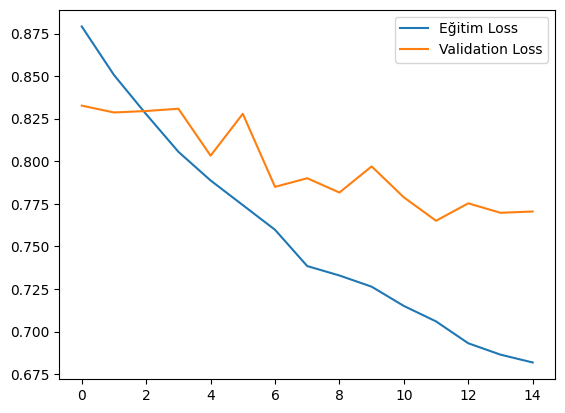

In [36]:
plt.figure()
plt.plot(history.history["loss"], label="Eğitim Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()


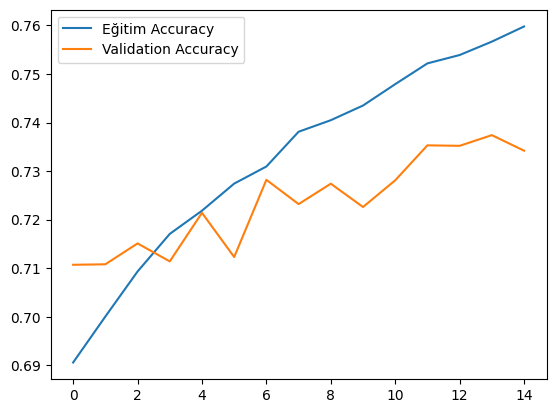

In [37]:
plt.figure()
plt.plot(history.history["accuracy"], label="Eğitim Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()